# Dataset Story 

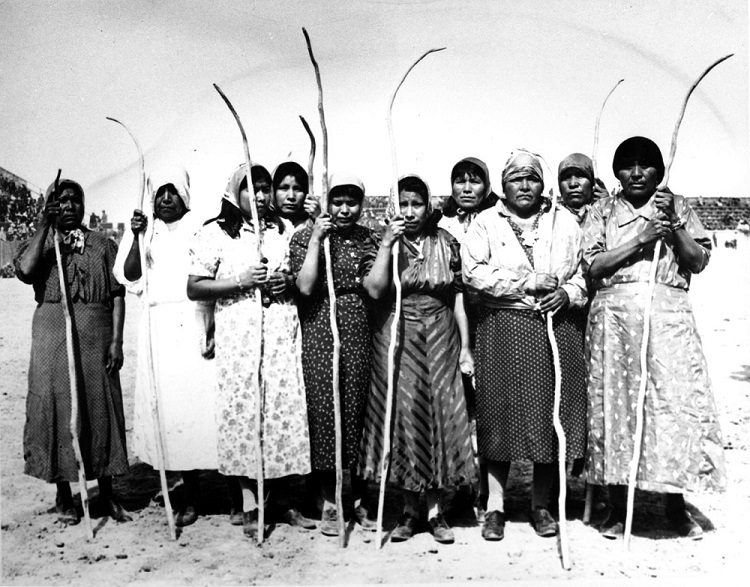

The dataset is part of the large dataset held at the National Institutes of Diabetes-Digestive-Kidney Diseases in the USA.

Data used for diabetes research on Pima Indian women aged 21 and over living in Phoenix, the 5th largest city of the State of Arizona in the USA. 

The target variable is specified as "outcome"

1 means the diabetes test is positive and 0 means negative. 

# Loading Related Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import missingno as msno

# Dataset Display Settings 

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [3]:
df_=pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

In [4]:
df=df_.copy()

In [5]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
608,0,152,82,39,272,41.500,0.270,27,0
61,8,133,72,0,0,32.900,0.270,39,1
304,3,150,76,0,0,21.000,0.207,37,0
100,1,163,72,0,0,39.000,1.222,33,1
337,5,115,76,0,0,31.200,0.343,44,1
68,1,95,66,13,38,19.600,0.334,25,0
223,7,142,60,33,190,28.800,0.687,61,0
692,2,121,70,32,95,39.100,0.886,23,0
277,0,104,64,23,116,27.800,0.454,23,0
746,1,147,94,41,0,49.300,0.358,27,1


# Let's Get To Know The Dataset. 

In [6]:
print("The dataset has {} rows and {} columns.".format(df.shape[0],df.shape[1]),end="\n\n")
print("Names of variables in the dataset:" )
for col in df.columns:
      print(col,end="  ")
print(end="\n\n")
print("Index information in the dataset:" )
print(df.index,end="\n\n")
print("Data type of variables in dataset :")
print(df.dtypes,end="\n\n")
print("Missing values of variables in the dataset: ")
print(df.isnull().sum(),end="\n\n")
print("The total number of missing values in the dataset: ")
print(df.isnull().sum().sum(),end="\n\n")
print("Memory usage of label values (index/columns) in the dataset: " )
print(df.memory_usage())

The dataset has 768 rows and 9 columns.

Names of variables in the dataset:
Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  DiabetesPedigreeFunction  Age  Outcome  

Index information in the dataset:
RangeIndex(start=0, stop=768, step=1)

Data type of variables in dataset :
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Missing values of variables in the dataset: 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The total number of missing values in t

# Let's Get to Know the Variables 

* If the Glucose value is 2 hours --> Fullness
* If the Glucose value is 8 hours --> Fasting Status 

### Variables Classification

In [7]:
def grab_col_names(dataframe,cat_th=10,car_th=20):
    #Kategorik degiskenler 
    cat_cols=[i for i in df.columns if df[i].dtypes=='O']
    num_but_cat=[i for i in df.columns if df[i].dtypes!='O' and df[i].nunique()<cat_th]
    cat_but_car=[i for i in df.columns if df[i].dtypes=='O' and df[i].nunique()>car_th]
    cat_cols=cat_cols+num_but_cat
    cat_cols=[i for i in cat_cols if i not in cat_but_car]
    #Sayisal Degiskenler
    num_cols=[i for i in df.columns if df[i].dtypes!='O']
    num_cols=[i for i in num_cols if i not in num_but_cat]
    
    print('Number of Observations : {}'.format(dataframe.shape[0]))
    print('Number of Variables    : {}'.format(dataframe.shape[1]))
    print('Number of Categorical Variables : {}'.format(len(cat_cols)))
    print('Number of Numerical Variables : {}'.format(len(num_cols)))
    print('Number of Numerical but Categorical Variables : {}'.format(len(num_but_cat)))
    print('Number of Categorical but Cardinal Variables : {}'.format(len(cat_but_car)))
    
    return cat_cols,num_cols,cat_but_car
                 

In [8]:
cat_cols,num_cols,cat_but_car=grab_col_names(df)
print(cat_cols)
print(num_cols)
print(cat_but_car)

Number of Observations : 768
Number of Variables    : 9
Number of Categorical Variables : 1
Number of Numerical Variables : 8
Number of Numerical but Categorical Variables : 1
Number of Categorical but Cardinal Variables : 0
['Outcome']
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[]


The number of categorical variables is 1 in total.
The categorical variable is the target/dependent ('Outcome') variable. 

### Examining Descriptive Statistics of Numerical Variables 

In [9]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000


Observation Units to Be Considered:

In a human
* the state of 0 glucose in the blood
* the state of having a blood pressure of 0
* the state of skin thickness being 0
* body mass index being 0

it is not possible. Therefore, we can interpret that 0-shaped observation units represent missing observation units. 

I accepted min values of the observation unit of each variable as 0 in order not to reject the hypothesis I created. So, I wanted to examine the 10 smallest min values.

In [10]:
imposible_conditions=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in imposible_conditions:
    print(i[0]+str(df[i].sort_values().loc[df[i].sort_values().values!=0].values[:10]))

G[44 56 57 57 61 62 65 67 68 68]
B[24 30 30 38 40 44 44 44 44 46]
S[ 7  7  8  8 10 10 10 10 10 11]
I[14 15 16 18 18 22 23 23 25 29]
B[18.2 18.2 18.2 18.4 19.1 19.3 19.4 19.5 19.5 19.6]


As can be seen, the values are quite far from zero, so the 0 state of the observation units is evaluated as NaN. 

### Examining the Target Variable 

0    500
1    268
Name: Outcome, dtype: int64


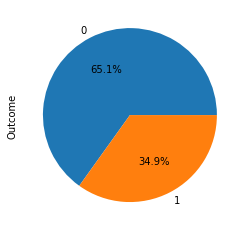

In [11]:
for i in cat_cols:
    print(df[i].value_counts())
    df[i].value_counts().plot(kind='pie',y='points',autopct='%1.1f%%')

#### Analysis of the Target Variable with Numerical Variables 

         Pregnancies
Outcome             
0              3.298
1              4.866




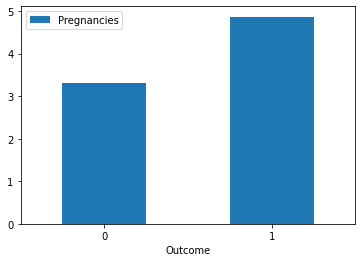

         Glucose
Outcome         
0        109.980
1        141.257




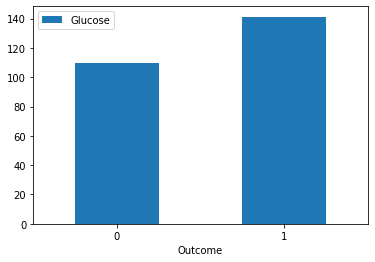

         BloodPressure
Outcome               
0               68.184
1               70.825




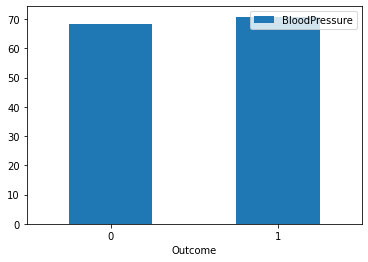

         SkinThickness
Outcome               
0               19.664
1               22.164




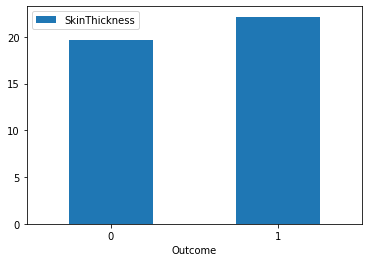

         Insulin
Outcome         
0         68.792
1        100.336




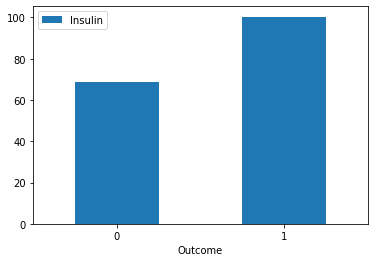

           BMI
Outcome       
0       30.304
1       35.143




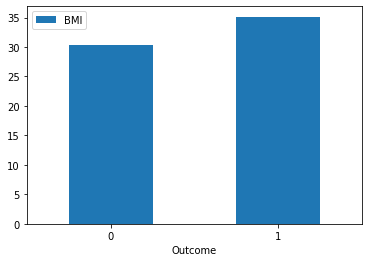

         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550




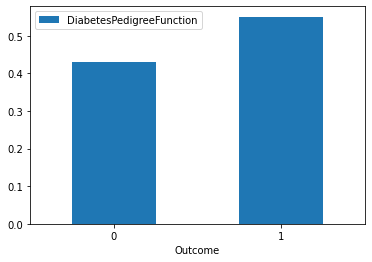

           Age
Outcome       
0       31.190
1       37.067




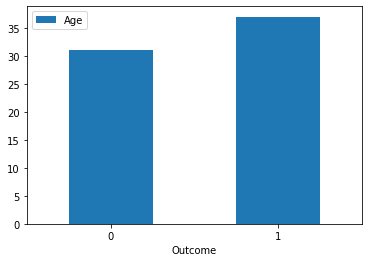

In [12]:
for i in num_cols:
    print(df.groupby('Outcome').agg({i:'mean'}),end='\n\n\n') 
    df.groupby('Outcome').agg({i:'mean'}).plot(kind='bar',rot=0)
    plt.show()

#### The Relationship of the Target Variable with Other Variables 

In [13]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


<AxesSubplot:>

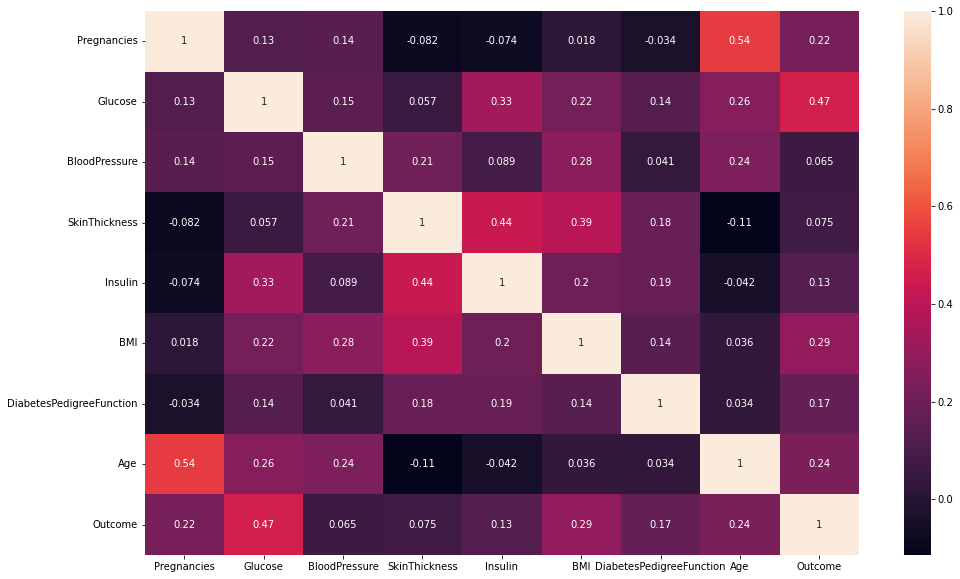

In [14]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

When the correlation is examined in case of missing observation units and outliers:

* There is a high correlation between the age of women and the number of conceptions. 
  As a woman's age increases, so does the number of times she gets pregnant.
  
* A high correlation relationship between glucose and diabetes
  The higher the glucose, the higher a woman's rate of diabetes.
  
* There is a high correlation between insulin and the skin thickness. 


In [15]:
df.corr()['Outcome'].nlargest(len(df.corr().columns))[1:]

Glucose                    0.467
BMI                        0.293
Age                        0.238
Pregnancies                0.222
DiabetesPedigreeFunction   0.174
Insulin                    0.131
SkinThickness              0.075
BloodPressure              0.065
Name: Outcome, dtype: float64

It can be interpreted as glucose, body mass index and age are the most important factors in the formation of diabetes. 

### Examination of Missing Observation Units 

In [16]:
print('Missing Number of Observation Units in the Data Set  : {}'.format(df.isnull().sum().sum()))

Missing Number of Observation Units in the Data Set  : 0


NOTE:

Since missing observation units are expressed with zero, if I perform the analysis of outlier observation units first, there will be variables that accept zero as outlier observation units. Thus, instead of NaN, the lower bound or upper bound value in the reassignment method will be assigned to the nearest threshold value.

In [17]:
imposible_conditions

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [18]:
for i in imposible_conditions:
    print("There are "+str(len(df.loc[(df[i]==0),i]))+" amounts of value 0 in "+i+" variable.")    

There are 5 amounts of value 0 in Glucose variable.
There are 35 amounts of value 0 in BloodPressure variable.
There are 227 amounts of value 0 in SkinThickness variable.
There are 374 amounts of value 0 in Insulin variable.
There are 11 amounts of value 0 in BMI variable.


In [19]:
for i in imposible_conditions:
    df.loc[(df[i]==0),i]=np.NaN

In [20]:
print('Missing Number of Observation Units on the basis of Variables in the Data Set :'+"\n"+str(df.isnull().sum()),end='\n\n\n')
print(df[imposible_conditions].min())

Missing Number of Observation Units on the basis of Variables in the Data Set :
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Glucose         44.000
BloodPressure   24.000
SkinThickness    7.000
Insulin         14.000
BMI             18.200
dtype: float64


<AxesSubplot:>

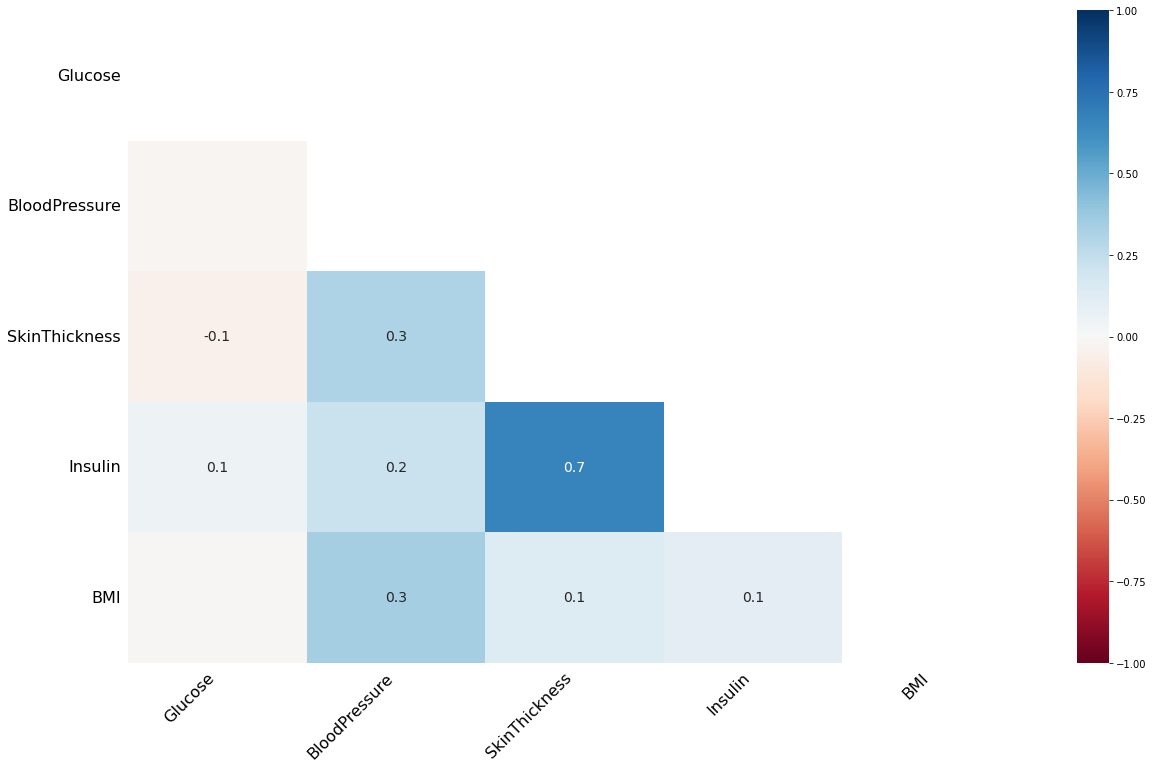

In [21]:
msno.heatmap(df)

Insulin and SkinTickness variables have missing observation units that occur simultaneously in a high correlation. 

To solve the problem of missing observation unit
* Drop
* Filling with a specific statistical metric
methods are used

If a product emerges when you want to develop a project in the health sector, in case of lack of data:
The method of filling in the missing data can lead to the diagnosis that will damage the vital functions of people if the variables have fragile classes.
The method of deleting the missing data will cause many data loss, but the product that will emerge will positively affect human life at the highest performance.

These are my thoughts. Since I will not produce a product as a result of my project or create any document that will affect the vital functions of individuals, I want to develop a model on excess data, so I prefer the method of filling in missing data with a statistical metric. 

In [22]:
#df.dropna(inplace=True)

In [23]:
df.groupby('Outcome')[imposible_conditions].mean()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
Outcome,,,,,
0,110.644,70.877,27.235,130.288,30.860
1,142.320,75.321,33.000,206.846,35.407


In [24]:
for i in imposible_conditions:
    df.loc[(df[i].isnull()) & (df['Outcome']==0),i] = df.groupby('Outcome')[i].mean()[0]
    df.loc[(df[i].isnull()) & (df['Outcome']==1),i] = df.groupby('Outcome')[i].mean()[1]

### Outlier Observation Unit Analysis 

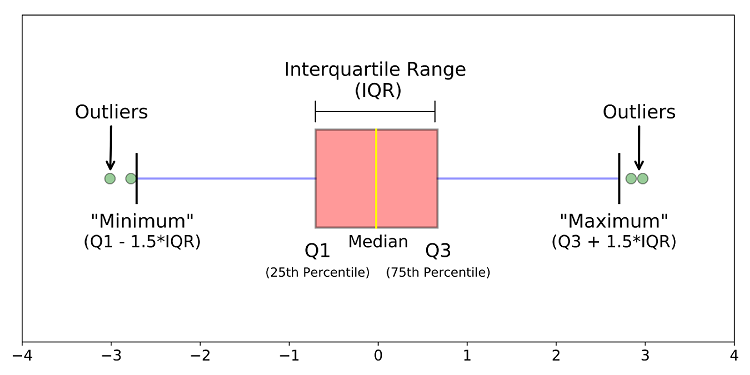

#### Calculating Threshold Values for Outlier Observations as Lower Limit and Upper Limit 

In [25]:
def outlier_thresholds(dataframe,col,q1=0.25,q3=0.75):
    quartile1=dataframe[col].quantile(q1)
    quartile3=dataframe[col].quantile(q3)
    inter_quartile_range=quartile3-quartile1
    down_limit=quartile1-(1.5*(inter_quartile_range))
    up_limit=quartile3 +(1.5*(inter_quartile_range))
    
    return down_limit,up_limit 

In [26]:
for i in num_cols:
    print(i+":"+str(outlier_thresholds(df,i)))

Pregnancies:(-6.5, 13.5)
Glucose:(37.875, 202.875)
BloodPressure:(40.0, 104.0)
SkinThickness:(13.0, 45.0)
Insulin:(-6.519230769230774, 334.86538461538464)
BMI:(13.849999999999998, 50.25)
DiabetesPedigreeFunction:(-0.32999999999999996, 1.2)
Age:(-1.5, 66.5)


#### Detecting the Presence of Outlier Observation Units

In [27]:
def check_outlier(dataframe,col):
    down_limit,up_limit=outlier_thresholds(dataframe,col)
    if dataframe[((dataframe[col]<down_limit) | (dataframe[col]>up_limit))].any(axis=None):
        return True
    else:
        return False

In [28]:
for i in num_cols:
    print(i+":"+str(check_outlier(df,i)))

Pregnancies:True
Glucose:False
BloodPressure:True
SkinThickness:True
Insulin:True
BMI:True
DiabetesPedigreeFunction:True
Age:True


#### Accessing The Index Information Of Outlier Observation Units 

In [29]:
def grab_outliers(dataframe,col,table=False,index=False):
    down,up=outlier_thresholds(dataframe,col)
    if table:
        if dataframe[((dataframe[col]<down) | (dataframe[col]>up))].any(axis=None):
            print(dataframe[((dataframe[col]<down) | (dataframe[col]>up))])
    if index:
        outliers_index=dataframe[((dataframe[col]<down) | (dataframe[col]>up))].index
        return outliers_index

In [30]:
for i in num_cols:
    print(i+": "+str(grab_outliers(df,i,False,True)),end='\n\n\n')
    outliers_index=grab_outliers(df,i,False,True)
    print("Outliers :"+"\n"+str(df[i][outliers_index]),end='\n\n\n')
                                 

Pregnancies: Int64Index([88, 159, 298, 455], dtype='int64')


Outliers :
88     15
159    17
298    14
455    14
Name: Pregnancies, dtype: int64


Glucose: Int64Index([], dtype='int64')


Outliers :
Series([], Name: Glucose, dtype: float64)


BloodPressure: Int64Index([18, 43, 84, 106, 125, 177, 362, 549, 597, 599, 658, 662, 672, 691], dtype='int64')


Outliers :
18     30.000
43    110.000
84    108.000
106   122.000
125    30.000
177   110.000
362   108.000
549   110.000
597    24.000
599    38.000
658   106.000
662   106.000
672   106.000
691   114.000
Name: BloodPressure, dtype: float64


SkinThickness: Int64Index([16, 32, 39, 50, 55, 57, 86, 99, 120, 150, 169, 177, 211, 254, 273, 275, 279, 313, 316, 320, 353, 370, 382, 393, 409, 422, 428, 432, 434, 444, 445, 446, 458, 466, 519, 532, 539, 575, 579, 580, 585, 591, 625, 639, 657, 662, 663, 671, 689, 693, 698, 718, 763], dtype='int64')


Outliers :
16    47.000
32    11.000
39    47.000
50    11.000
55    10.000
57    60.000
86    54.

#### Solving Outlier Observation Units Problems 

Outlier observation units:

* It is deleted from the data set by the drop method.
* It is reassigned to the closest threshold value. 

#### Re-assignment with Tresholds 

In [31]:
def replace_with_thresholds(dataframe,col):
    down_limit,up_limit=outlier_thresholds(dataframe,col)
    dataframe.loc[(dataframe[col]<down_limit),col]=down_limit
    dataframe.loc[(dataframe[col]>up_limit),col]=up_limit

In [32]:
for i in num_cols:
    print(i+":"+str(check_outlier(df,i)))

Pregnancies:True
Glucose:False
BloodPressure:True
SkinThickness:True
Insulin:True
BMI:True
DiabetesPedigreeFunction:True
Age:True


In [33]:
for i in num_cols:
    replace_with_thresholds(df,i)

In [34]:
for i in num_cols:
    print(i+":"+str(check_outlier(df,i)))

Pregnancies:False
Glucose:False
BloodPressure:False
SkinThickness:False
Insulin:False
BMI:False
DiabetesPedigreeFunction:False
Age:False


<AxesSubplot:>

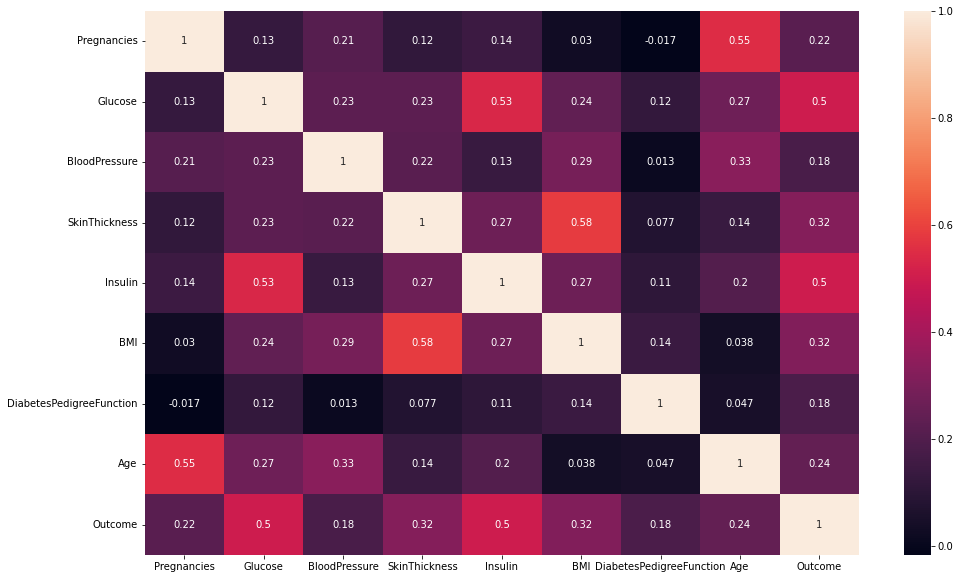

In [35]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

After missing observation units were dropped and outlier observation units were assigned to the closest threshold values, the existing correlation structure changed. Correlation rates also increased.
  
 
* The correlation between the age of the women and the number of conceptions increased.
* The correlation between Glucose and Diabetes has increased.
* The correlation between Glucose and Diabetes has increased.
* The correlation between skin thickness and body mass index increased.

### Feature Engineering 

Using data from the World Health Organization
* I will create new variables by dividing numeric variables into segments
* I will create new variables according to the logical relations between the variables. 

#### Categorical Age

In [36]:
df['Categorical_Age']=pd.cut(df['Age'],bins=[20,35,50,df['Age'].max()],labels=['young','mature','senior'])

In [37]:
df.groupby('Categorical_Age')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Categorical_Age,,,,,,,,
young,498.000,25.906,3.957,21.000,22.000,25.000,29.000,35.000
mature,189.000,41.714,3.960,36.000,38.000,41.000,45.000,50.000
senior,81.000,58.179,5.298,51.000,53.000,58.000,63.000,66.500


#### Categorical BMI

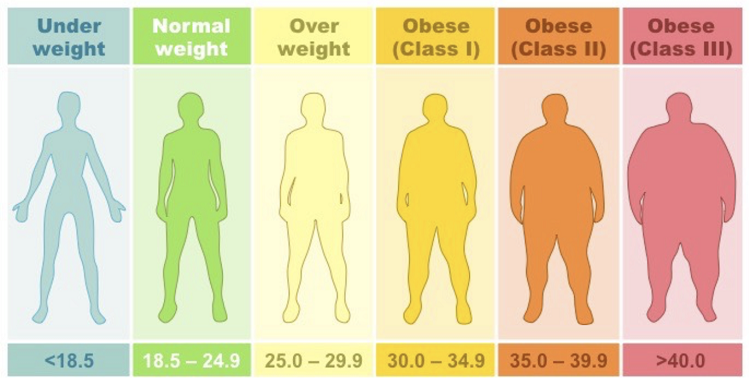

In [38]:
df['Categorical_BMI']=pd.cut(df['BMI'],bins=[0,18.4,24.9,29.9,34.9,39.9,df['BMI'].max()]
                             ,labels=['Under_weight','Normal_weight','Pre-obesity','Obesity_class_I','Obesity_class_II',
                                      'Obesity_class_III'])


In [39]:
df.groupby('Categorical_BMI')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
Categorical_BMI,,,,,,,,
Under_weight,4.000,18.250,0.100,18.200,18.200,18.200,18.250,18.400
Normal_weight,102.000,22.769,1.611,19.100,21.800,23.100,24.200,24.900
Pre-obesity,179.000,27.500,1.492,25.000,26.150,27.600,28.700,29.900
Obesity_class_I,233.000,32.450,1.473,30.000,31.100,32.500,33.700,34.900
Obesity_class_II,152.000,37.240,1.458,35.000,35.900,37.200,38.500,39.900
Obesity_class_III,98.000,44.205,3.002,40.000,42.100,43.400,46.025,50.250


#### Categorical Glucose

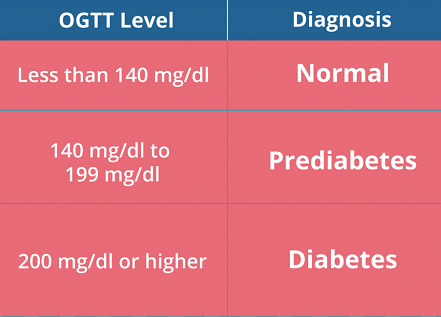

In [40]:
df['Categorical_Glucose']=pd.cut(df['Glucose'],bins=[0,140,200,df['Insulin'].max()]
                                 ,labels=['Normal','Prediabetes','Diabetes'])

In [41]:
df.groupby('Categorical_Glucose')['Glucose'].describe()

,count,mean,std,min,25%,50%,75%,max
Categorical_Glucose,,,,,,,,
Normal,574.000,107.371,18.188,44.000,95.000,108.000,122.000,140.000
Prediabetes,194.000,164.086,17.002,141.000,148.000,162.000,179.000,199.000
Diabetes,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Categorical Blood Pressure

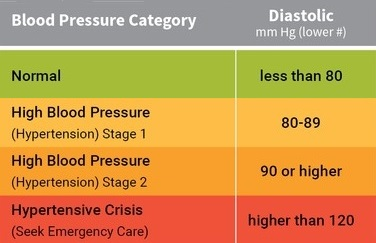

In [42]:
df['Categorical_BloodPressure'] = pd.cut(df['BloodPressure'], bins = [0,80, 90, 120,200], 
                                         labels=["Normal", "Hypertension_Stage1","Hypertension_Stage2", 
                                          "Hypertensive_Crisis"])

In [43]:
df.groupby('Categorical_BloodPressure')['BloodPressure'].describe()

,count,mean,std,min,25%,50%,75%,max
Categorical_BloodPressure,,,,,,,,
Normal,603.000,67.980,8.551,40.000,62.000,70.000,74.000,80.000
Hypertension_Stage1,127.000,85.732,2.846,82.000,84.000,86.000,88.000,90.000
Hypertension_Stage2,38.000,97.974,4.846,92.000,94.000,97.000,104.000,104.000
Hypertensive_Crisis,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Categorical İnsulin

In [44]:
df['Categorical_Insulin']=pd.cut(df['Insulin'],bins=[0,100,126,df['Insulin'].max()],
                                 labels=['Low_Anormal','Normal','High_Anormal'])

In [45]:
df.groupby('Categorical_Insulin')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Categorical_Insulin,,,,,,,,
Low_Anormal,151.000,66.026,21.956,14.000,50.000,66.000,84.500,100.000
Normal,50.000,114.080,7.270,105.000,106.000,115.000,120.000,126.000
High_Anormal,567.000,177.582,57.291,127.000,130.288,156.000,206.846,334.865


#### Feature_Coef

After standardizing each variable, I want to generate a coefficient as a result of their interaction with each other. 

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()

In [48]:
df['Feature_Coef']=1
for i in df.columns:
    if not i.startswith('Categorical') and i!='Outcome':
        df[['Feature_Coef']]*=scaler.fit_transform(df[[i]])

#### Medical Informations


- Since glucose permeability and intake is high during pregnancy, gestational diabetes occurs and increases over time.
  Therefore, if the number of pregnancies increases
  * glucose increases
  * insulin resistance is also reduced
    

- As the glucose value increases, the mass index also increases. The increase in the mass index occurs as a result of the increase in weight.
  If weight increases, cholesterol increases, hardening occurs in the veins, so blood pressure also increases.
  
- If the body mass index increases, the skin thickness also increases, and even vascular access cannot be found.
   
- As a person gets older, his vital functions also slow down, so the pancreas becomes unable to break down glucose with the hormone insulin.
- As the age progresses, the energy taken with glucose cannot be burned because the mobility is reduced, so an increase in the body mass index is           observed. 

#### Pregnancy_Per_Glucose

During pregnancy, glucose permeability and glucose uptake will increase and gestational diabetes occurs. 

In [49]:
df['Pregnancy_Per_Glucose']=df['Pregnancies']/df['Glucose']

In [50]:
df.groupby('Pregnancies')['Pregnancy_Per_Glucose'].mean()

Pregnancies
0.000    0.000
1.000    0.009
2.000    0.019
3.000    0.026
4.000    0.034
5.000    0.044
6.000    0.051
7.000    0.055
8.000    0.066
9.000    0.074
10.000   0.088
11.000   0.089
12.000   0.110
13.000   0.109
13.500   0.099
Name: Pregnancy_Per_Glucose, dtype: float64

Since the outlier observation units are reassigned to the closest threshold value, the proportionality may be distorted after the saturation point. 

#### Insulin_Per_Pregnancy

As the number of pregnancies increases, insulin resistance will decrease. 

In [51]:
df['Insulin_Per_Pregnancy']=df['Insulin']/df['Pregnancies']

In [52]:
with pd.option_context('mode.use_inf_as_na', True):
    df = df.dropna(subset=['Insulin_Per_Pregnancy'], how='all')

In [53]:
df.groupby('Pregnancies')['Insulin_Per_Pregnancy'].describe()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,,,,,,,,
1.000,135.000,134.674,73.500,18.000,79.500,130.288,179.000,334.865
2.000,103.000,67.551,34.365,7.500,47.000,65.144,79.500,167.433
3.000,75.000,47.816,22.595,6.000,35.000,43.429,62.500,111.622
4.000,68.000,40.280,15.754,12.250,32.572,32.572,51.712,83.716
5.000,57.000,30.672,13.420,4.400,26.058,26.058,41.369,66.973
6.000,50.000,27.005,9.199,9.000,21.715,21.715,34.474,55.811
7.000,45.000,25.388,9.910,6.857,18.613,27.143,29.549,47.838
8.000,38.000,22.732,8.797,6.125,16.286,25.856,25.856,41.858
9.000,28.000,19.105,6.549,6.222,14.476,21.214,22.983,37.207


#### BMI_Per_SkinThickness

If the body mass index increases, the skin thickness will also increase.

In [54]:
df['BMI_Per_SkinThickness']=df['BMI']/df['SkinThickness']

In [55]:
df.groupby('Categorical_BMI')['BMI_Per_SkinThickness'].describe()

,count,mean,std,min,25%,50%,75%,max
Categorical_BMI,,,,,,,,
Under_weight,3.000,0.946,0.273,0.668,0.813,0.958,1.086,1.213
Normal_weight,89.000,1.147,0.367,0.623,0.841,1.123,1.492,1.908
Pre-obesity,164.000,1.178,0.356,0.682,0.926,1.072,1.332,2.285
Obesity_class_I,204.000,1.163,0.332,0.678,0.956,1.104,1.251,2.654
Obesity_class_II,132.000,1.149,0.237,0.789,0.955,1.138,1.297,2.153
Obesity_class_III,65.000,1.263,0.229,0.900,1.105,1.232,1.436,1.892


#### BloodPressure_Per_BMI

As the glucose value increases, the mass index also increases. The increase in the mass index occurs as a result of the increase in weight. If weight increases, cholesterol increases, hardening occurs in the veins.Therefore, blood pressure also increases. 

In [56]:
df['BloodPressure_Per_BMI']=df['BloodPressure']/df['BMI']

In [57]:
df.groupby('Categorical_BMI')['BloodPressure'].describe()

,count,mean,std,min,25%,50%,75%,max
Categorical_BMI,,,,,,,,
Under_weight,3.000,67.333,3.055,64.000,66.000,68.000,69.000,70.000
Normal_weight,89.000,68.219,12.330,40.000,60.000,68.000,76.000,104.000
Pre-obesity,164.000,69.458,10.534,40.000,62.000,70.000,75.000,104.000
Obesity_class_I,204.000,71.714,10.726,44.000,64.000,71.439,78.000,102.000
Obesity_class_II,132.000,75.965,11.112,44.000,70.000,75.321,84.000,104.000
Obesity_class_III,65.000,78.425,13.516,40.000,72.000,78.000,86.000,104.000


#### Glucose_per_BMI

If the body mass index increases, so does the glucose. 

In [58]:
df['Glucose_per_BMI']=df['Glucose']/df['BMI']

In [59]:
df.groupby('Categorical_BMI')['Glucose'].describe()

,count,mean,std,min,25%,50%,75%,max
Categorical_BMI,,,,,,,,
Under_weight,3.000,92.333,8.083,83.000,90.000,97.000,97.000,97.000
Normal_weight,89.000,108.592,24.850,56.000,94.000,103.000,118.000,194.000
Pre-obesity,164.000,117.797,27.816,44.000,98.500,114.000,134.250,197.000
Obesity_class_I,204.000,123.542,32.534,57.000,100.000,121.000,146.250,197.000
Obesity_class_II,132.000,125.980,31.548,68.000,102.000,121.000,146.000,197.000
Obesity_class_III,65.000,134.128,29.852,79.000,115.000,134.000,153.000,199.000


#### BloodPressure_per_Glucose

- When glucose increases, weight gain occurs, so body mass index increases.
- Weight gain causes hardening of the arteries and cholesterol occurs.
- Cholesterol also increases blood pressure.
- If glucose increases, blood pressure also increases indirectly. 

In [60]:
df['BloodPressure_per_Glucose']=df['BloodPressure']/df['Glucose']

In [61]:
df.groupby('Categorical_Glucose')['BloodPressure'].describe()

,count,mean,std,min,25%,50%,75%,max
Categorical_Glucose,,,,,,,,
Normal,488.000,70.859,11.715,40.000,62.000,70.877,78.000,104.000
Prediabetes,169.000,75.978,10.838,50.000,70.000,76.000,84.000,104.000
Diabetes,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Per Age 
* Body Mass Index
* Glucose
* Insulin

will be interpreted as follows.

As the age progresses, the energy taken with glucose becomes impossible to burn because the mobility is reduced.

- Glucose increases as it is stored and not burned.
- Body mass index increases
- Insulin resistance decreases. 

#### BMI_Per_Age

In [62]:
df['BMI_Per_Age']=df['BMI']/df['Age']

In [63]:
df.groupby('Categorical_BMI')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Categorical_BMI,,,,,,,,
Under_weight,3.000,23.000,3.464,21.000,21.000,21.000,24.000,27.000
Normal_weight,89.000,32.185,12.642,21.000,22.000,26.000,37.000,66.500
Pre-obesity,164.000,32.985,12.349,21.000,23.000,29.000,39.000,66.500
Obesity_class_I,204.000,34.819,11.359,21.000,25.000,33.000,42.000,66.500
Obesity_class_II,132.000,36.477,11.314,21.000,28.000,34.500,43.000,66.500
Obesity_class_III,65.000,33.431,9.417,21.000,26.000,31.000,42.000,54.000


#### Glucose_Per_Age

In [64]:
df['Glucose_Per_Age']=df['Glucose']/df['Age']

In [65]:
df.groupby('Categorical_Glucose')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Categorical_Glucose,,,,,,,,
Normal,488.000,32.347,10.905,21.000,24.000,28.500,39.000,66.500
Prediabetes,169.000,39.340,12.273,21.000,29.000,38.000,49.000,66.500
Diabetes,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Insulin_Per_Age

In [66]:
df['Insulin_Per_Age']=df['Insulin']/df['Age']

In [67]:
df.groupby('Categorical_Insulin')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Categorical_Insulin,,,,,,,,
Low_Anormal,130.000,27.696,7.634,21.000,22.000,25.000,29.750,66.500
Normal,42.000,33.381,9.750,22.000,25.000,30.500,41.750,57.000
High_Anormal,485.000,35.941,12.107,21.000,26.000,33.000,43.000,66.500


### Encoding

#### Label Encoding

In [68]:
cat_cols,num_cols,cat_but_car=grab_col_names(df)

Number of Observations : 657
Number of Variables    : 24
Number of Categorical Variables : 6
Number of Numerical Variables : 18
Number of Numerical but Categorical Variables : 6
Number of Categorical but Cardinal Variables : 0


In [69]:
binary_columns=[i for i in cat_cols if df[i].nunique()==2]
binary_columns

['Outcome', 'Categorical_Glucose']

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
lbe=LabelEncoder()

In [72]:
df['Categorical_Glucose']=lbe.fit_transform(df['Categorical_Glucose'])

In [73]:
df['Categorical_Glucose'].unique()

array([1, 0])

#### One-Hot Encoding

In [74]:
one_hot_cols=[i for i in cat_cols if 10>=df[i].nunique()>2]
one_hot_cols

['Categorical_Age',
 'Categorical_BMI',
 'Categorical_BloodPressure',
 'Categorical_Insulin']

In [75]:
def one_hot_encoder(dataframe,col):
    dataframe=pd.get_dummies(data=dataframe,columns=one_hot_cols,drop_first=True)
    return dataframe

In [76]:
df=one_hot_encoder(df,one_hot_cols)

In [77]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Categorical_Glucose,Feature_Coef,Pregnancy_Per_Glucose,Insulin_Per_Pregnancy,BMI_Per_SkinThickness,BloodPressure_Per_BMI,Glucose_per_BMI,BloodPressure_per_Glucose,BMI_Per_Age,Glucose_Per_Age,Insulin_Per_Age,Categorical_Age_mature,Categorical_Age_senior,Categorical_BMI_Normal_weight,Categorical_BMI_Pre-obesity,Categorical_BMI_Obesity_class_I,Categorical_BMI_Obesity_class_II,Categorical_BMI_Obesity_class_III,Categorical_BloodPressure_Hypertension_Stage1,Categorical_BloodPressure_Hypertension_Stage2,Categorical_BloodPressure_Hypertensive_Crisis,Categorical_Insulin_Normal,Categorical_Insulin_High_Anormal
0,6.000,148.000,72.000,35.000,206.846,33.600,0.627,50.000,1,1,-0.000,0.041,34.474,0.960,2.143,4.405,0.486,0.672,2.960,4.137,1,0,0,0,1,0,0,0,0,0,0,1
1,1.000,85.000,66.000,29.000,130.288,26.600,0.351,31.000,0,0,0.000,0.012,130.288,0.917,2.481,3.195,0.776,0.858,2.742,4.203,0,0,0,1,0,0,0,0,0,0,0,1
2,8.000,183.000,64.000,33.000,206.846,23.300,0.672,32.000,1,1,0.001,0.044,25.856,0.706,2.747,7.854,0.350,0.728,5.719,6.464,0,0,1,0,0,0,0,0,0,0,0,1
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,0,0.042,0.011,94.000,1.222,2.349,3.167,0.742,1.338,4.238,4.476,0,0,0,1,0,0,0,0,0,0,0,0
5,5.000,116.000,74.000,27.235,130.288,25.600,0.201,30.000,0,0,0.000,0.043,26.058,0.940,2.891,4.531,0.638,0.853,3.867,4.343,0,0,0,1,0,0,0,0,0,0,0,1


In [78]:
cat_cols,num_cols,cat_but_car=grab_col_names(df)

Number of Observations : 657
Number of Variables    : 32
Number of Categorical Variables : 14
Number of Numerical Variables : 18
Number of Numerical but Categorical Variables : 14
Number of Categorical but Cardinal Variables : 0


#### Rare Encoder

Comparing The Classes Of Categorical Variables With The Target Variable 

In [79]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

rare_analyser(df, "Outcome", cat_cols)

Outcome : 2
   COUNT  RATIO  TARGET_MEAN
0    427  0.650        0.000
1    230  0.350        1.000


Categorical_Glucose : 2
   COUNT  RATIO  TARGET_MEAN
0    488  0.743        0.232
1    169  0.257        0.692


Categorical_Age_mature : 2
   COUNT  RATIO  TARGET_MEAN
0    475  0.723        0.282
1    182  0.277        0.527


Categorical_Age_senior : 2
   COUNT  RATIO  TARGET_MEAN
0    582  0.886        0.333
1     75  0.114        0.480


Categorical_BMI_Normal_weight : 2
   COUNT  RATIO  TARGET_MEAN
0    568  0.865        0.393
1     89  0.135        0.079


Categorical_BMI_Pre-obesity : 2
   COUNT  RATIO  TARGET_MEAN
0    493  0.750        0.389
1    164  0.250        0.232


Categorical_BMI_Obesity_class_I : 2
   COUNT  RATIO  TARGET_MEAN
0    453  0.689        0.313
1    204  0.311        0.431


Categorical_BMI_Obesity_class_II : 2
   COUNT  RATIO  TARGET_MEAN
0    525  0.799        0.328
1    132  0.201        0.439


Categorical_BMI_Obesity_class_III : 2
   COUNT  RATIO  TARG

I will not use a rare encoder because I cannot observe a class value with a rare frequency. 

### Feature Scaling 

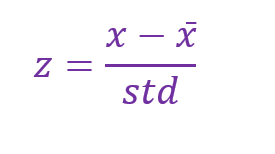

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Feature_Coef',
 'Pregnancy_Per_Glucose',
 'Insulin_Per_Pregnancy',
 'BMI_Per_SkinThickness',
 'BloodPressure_Per_BMI',
 'Glucose_per_BMI',
 'BloodPressure_per_Glucose',
 'BMI_Per_Age',
 'Glucose_Per_Age',
 'Insulin_Per_Age']

In [82]:
scaler=StandardScaler()

In [83]:
df[num_cols]=scaler.fit_transform(df[num_cols])

### Correlation Analysis 

In [84]:
corr_Series=df.corr()['Outcome'].nlargest(len(df.columns))
corr_Series

Outcome                                          1.000
Insulin                                          0.517
Glucose                                          0.492
Categorical_Glucose                              0.422
SkinThickness                                    0.332
BMI                                              0.320
Age                                              0.271
Pregnancies                                      0.267
Categorical_Insulin_High_Anormal                 0.248
Insulin_Per_Age                                  0.234
Categorical_Age_mature                           0.230
BloodPressure                                    0.196
Glucose_per_BMI                                  0.196
DiabetesPedigreeFunction                         0.184
Categorical_BMI_Obesity_class_III                0.174
Categorical_BloodPressure_Hypertension_Stage1    0.117
Categorical_BMI_Obesity_class_I                  0.114
Categorical_Age_senior                           0.098
Categorica

### Model

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [86]:
primitive_success=[]
model_names=[]
y=df['Outcome']
X=df.drop('Outcome',axis=1)
# Orjinal Veri Setinden Eğitim Seti ve Test Seti Oluşturma
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

def ML(algName):

    # Model Olusturma / Eğitme
    model=algName().fit(X_train,y_train)
    model_name=algName.__name__
    model_names.append(model_name)
    # Tahmin
    y_pred=model.predict(X_test)
    # ilkel-Başarı / Doğrulama Skoru
    from sklearn.metrics import accuracy_score
    primitiveSuccess=accuracy_score(y_test,y_pred)
    primitive_success.append(primitiveSuccess)
    return  primitive_success,model_names,model


In [87]:
models=[KNeighborsClassifier,SVC,MLPClassifier,DecisionTreeClassifier,
        RandomForestClassifier,GradientBoostingClassifier,XGBClassifier,LGBMClassifier]
for i in models:
    ML(i)


classification_Data=pd.DataFrame( primitive_success,columns=['accuracy_Score'],index=[model_names]).sort_values(by='accuracy_Score',ascending=False)
classification_Data



[15:39:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,accuracy_Score
GradientBoostingClassifier,0.869
XGBClassifier,0.869
LGBMClassifier,0.869
SVC,0.833
RandomForestClassifier,0.828
MLPClassifier,0.818
KNeighborsClassifier,0.798
DecisionTreeClassifier,0.798


### Variables and Significance Levels 

[15:39:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


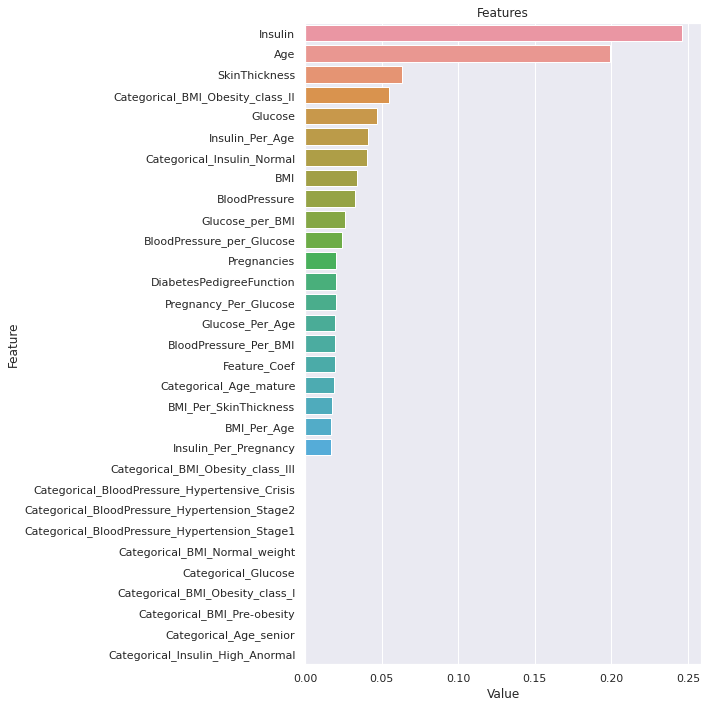

In [88]:
primitive_success=[]
model_names=[]
y=df['Outcome']
X=df.drop('Outcome',axis=1)
# Orjinal Veri Setinden Eğitim Seti ve Test Seti Oluşturma
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

model=XGBClassifier().fit(X_train,y_train)

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(model, X_train)

### **If you want to interact with me :**

**My LinkedIn Address** :

<a href="https://www.linkedin.com/in/ibrahim-turkoglu-102a3a211/">LinkedIn</a>

**My Medium   Address** :

<a href="https://medium.com/@trkglu.ibrahim">Medium</a>

**My Github   Address** :

<a href="https://github.com/ibrahimturkoglu">Github</a>
